# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

### **The objective:**

 - What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

**Note**: After running this commands, you’ll be prompted to restart your notebook/runtime. Please go ahead and do that. Once restarted, simply proceed to the next step of your workflow

In [1]:
!pip install numpy==1.26.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.0 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.0 which is incompatible.


In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Warnings
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
# Import seaborn - Slightly advanced library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [3]:
# Importing the datasets
count_data = pd.read_csv('/content/drive/MyDrive/Python Course/count_data.csv')
song_data = pd.read_csv('/content/drive/MyDrive/Python Course/song_data.csv')

### **Understanding the data by viewing a few observations**

In [4]:
# Display first 10 records of count_df data
print(count_data.head(10))


   Unnamed: 0                                   user_id             song_id  \
0           0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1           1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2           2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3           3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4           4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
5           5  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODDNQT12A6D4F5F7E   
6           6  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODXRTY12AB0180F3B   
7           7  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFGUAY12AB017B0A8   
8           8  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOFRQTD12A81C233C0   
9           9  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOHQWYZ12A6D4FA701   

   play_count  
0           1  
1           2  
2           1  
3           1  
4           1  
5           5  
6           1  
7 

In [5]:
# Display first 10 records of song_df data
print(song_data.head(10))


              song_id                                              title  \
0  SOQMMHC12AB0180CB8                                       Silent Night   
1  SOVFVAK12A8C1350D9                                        Tanssi vaan   
2  SOGTUKN12AB017F4F1                                  No One Could Ever   
3  SOBNYVR12A8C13558C                                      Si Vos Querés   
4  SOHSBXH12A8C13B0DF                                   Tangle Of Aspens   
5  SOZVAPQ12A8C13B63C  Symphony No. 1 G minor "Sinfonie Serieuse"/All...   
6  SOQVRHI12A6D4FB2D7                                   We Have Got Love   
7  SOEYRFT12AB018936C                                  2 Da Beat Ch'yall   
8  SOPMIYT12A6D4F851E                                            Goodbye   
9  SOJCFMH12A8C13B0C2                         Mama_ mama can't you see ?   

                                release  \
0                 Monster Ballads X-Mas   
1                           Karkuteillä   
2                                B

### **Let us check the data types and and missing values of each column**

In [6]:
# Display info of count_df
print(count_data.info())

# missing values for each column in count_data
print("Missing values in count_data:")
print(count_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB
None
Missing values in count_data:
Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64


In [7]:
# Display info of song_df
print(song_data.info())

# Display missing values for each column in song_data
print("Missing values in song_data:")
print(song_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB
None
Missing values in song_data:
song_id         0
title          17
release         7
artist_name     0
year            0
dtype: int64


#### **Observations and Insights: Count data has 2 million rows and song data has 1 million - there appears to be a splitting. Count data has no missing values but song data has 17 missing title values and release has 7, we will need to 0 or n/a convert these. song data has more columns than count data as expected so we will merge count into song based on song id and drop the unnamed column below. We will consider cleaning missing values when necessary.**


In [8]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = count_data.merge(song_data.drop_duplicates(subset='song_id'), on='song_id', how='left')

# Drop the column 'Unnamed: 0'
df = df.drop(columns='Unnamed: 0')
## Name the obtained dataframe as "df"

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [9]:
# Apply label encoding for "user_id" and "song_id"

#import
from sklearn.preprocessing import LabelEncoder

#encoders
user_encoder = LabelEncoder()
song_encoder = LabelEncoder()

# Encode user_id and song_id
df['user_id'] = user_encoder.fit_transform(df['user_id'])
df['song_id'] = song_encoder.fit_transform(df['song_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [10]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [11]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [12]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [13]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [14]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [15]:
# Check the shape of the data
#lets var define to make a clean print we can understand
rows, cols = df_final.shape
print(f"The dataset has {rows} rows and {cols} columns.")

The dataset has 117876 rows and 7 columns.


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [16]:
# Display total number of unique user_id
# we are going to format print statements for result outputs for clarity
print(f"Total unique users: {df_final['user_id'].nunique()}")

Total unique users: 3155


Total number of unique song id

In [17]:
# Display total number of unique song_id
print(f"Total unique songs: {df_final['song_id'].nunique()}")

Total unique songs: 563


Total number of unique artists

In [18]:
# Display total number of unique artists
print(f"Total unique artists: {df_final['artist_name'].nunique()}")

Total unique artists: 232


#### **Observations and Insights: With 117,876 rows and 7 columns after cleaning and condensing we have 3155 unique users, 563 unique songs, and 232 artists - that gives the following ratios of 13.6 users to each artist, 5.6 users to each song and 2.43 songs to artists suggesting that the artists are the least diverse group in the dataset as is likely in the world. Still we see overall low user interaction and relative sparsity which is common.**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [19]:
#let's use our exploratory groupby statement with the appropriate vars
# and separation
# then sort by descending and display a head
# finally cleanly print this
# we want to look a play count, title, and artist to get a clear idea
most_interacted_songs = df_final.groupby('song_id').agg({
    'play_count': 'sum',
    'title': 'first',
    'artist_name': 'first'
}).sort_values('play_count', ascending=False).head(10)
print("Most interacted songs (by total play count):")
print(most_interacted_songs[['title', 'artist_name', 'play_count']])

Most interacted songs (by total play count):
                                  title                artist_name  play_count
song_id                                                                       
352      Dog Days Are Over (Radio Edit)     Florence + The Machine        1634
2220                      Sehr kosmisch                   Harmonia        1583
8582                       Use Somebody              Kings Of Leon        1463
5531                            Secrets                OneRepublic        1427
4448                          Fireflies         Charttraxx Karaoke        1291
4152                      The Scientist                   Coldplay        1259
1334                   Hey_ Soul Sister                      Train        1208
1118                             Clocks                   Coldplay        1203
8092                                OMG  Usher featuring will.i.am        1126
6189                   Creep (Explicit)                  Radiohead        1067


Most interacted users

In [20]:
#let's use our exploratory groupby statement with the appropriate vars
# and separation
# then sort by descending and display a head
# finally cleanly print this
# we want to look a play count and user id to get a clear idea
most_interacted_users = df_final.groupby('user_id')['play_count'].sum().sort_values(ascending=False).head(10)
print("\nMost interacted users (by total play count):")
print(most_interacted_users)


Most interacted users (by total play count):
user_id
3237     586
15733    479
62759    438
43041    417
27401    409
66268    403
23337    399
48844    397
19783    396
55266    387
Name: play_count, dtype: int64


#### **Observations and Insights: The most interacted song is florence and the machine dog days are over with 1634 plays the 10th position has 1067 plays roughly 40% less indicating volatility in this data set and competition. These are much higher than our above ratios suggesting a potential skew despite being the top 10 they reduce 40% within a fraction of the total iterations. The most interactive user is 3237 with 586 plays and the 10th position is 387 showing a lower initial variation at the high end.**


Songs released on yearly basis

In [21]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
songs_by_year = song_data.groupby('year').size()

#let's double back and see the shape
max_year = song_data['year'].max()
print(f"Maximum year: {max_year}")
min_year = song_data[song_data['year'] > 0]['year'].min()
print(f"Minimum year (excluding 0 or missing): {min_year}")

Maximum year: 2011
Minimum year (excluding 0 or missing): 1922


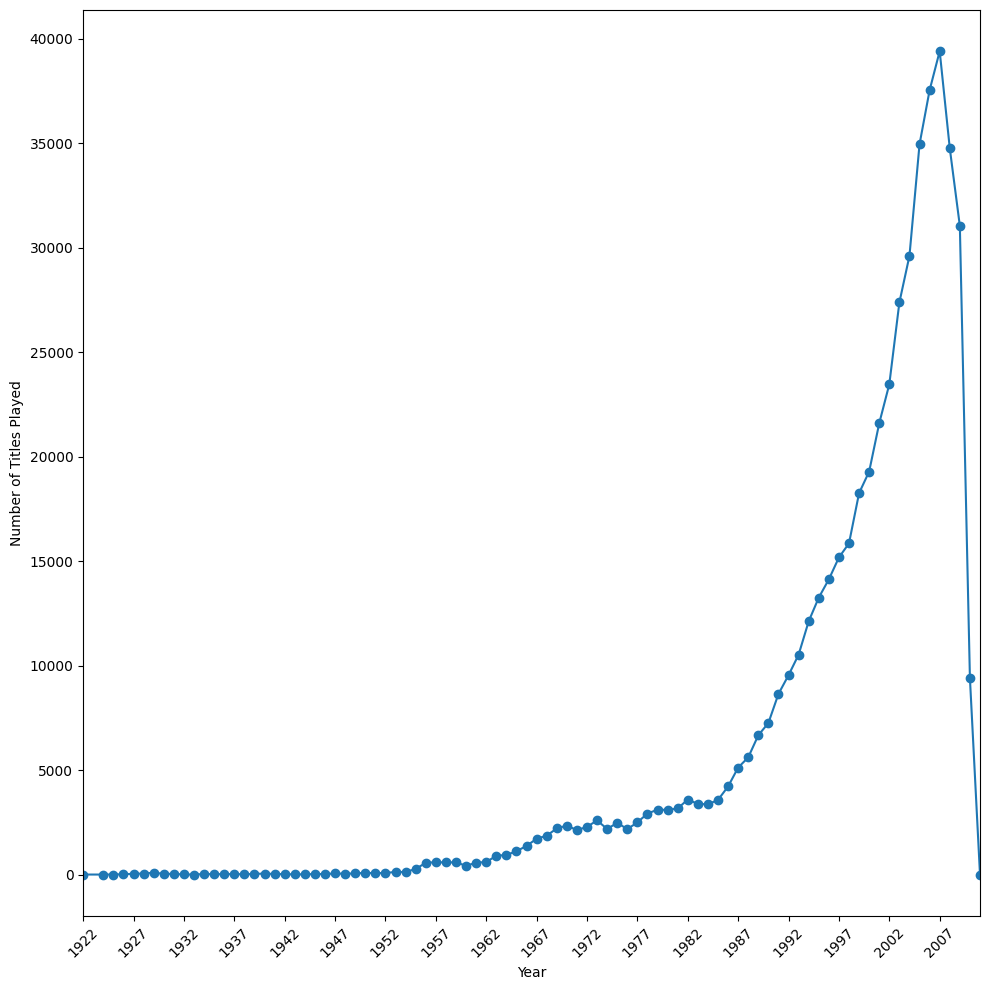

In [22]:
# I noticed that we actually need to filter out 0 values to have a clear view
# took me a bit to figure out how to clean properly but here it is
song_data['year'] = pd.to_numeric(song_data['year'], errors='coerce')
songs_by_year = song_data[(song_data['year'] > 0) & (song_data['year'] <= 2011)].groupby('year').size()

# Create a line plot for better control
plt.figure(figsize=(10, 10))  # Set the figure size
plt.plot(songs_by_year.index, songs_by_year.values, '-o')

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of Titles Played')

# Set x-axis ticks to every 5 years between 1922 and 2011
plt.xticks(ticks=range(1922, 2012, 5), rotation=45)

# Set x-axis limits to match data range
plt.xlim(1922, 2011)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

#### **Observations and Insights: After we trimmed and cleaned the data we see a representation of how much a song is plauyed over time increasing - the scale is such that until 1957 we don't get to see variation, we would have to draw and define an interval for it to analyze it - this is because by 2002-2007 we hit 40,000 plays and then this quickly drops off which is most likely explained by data availability in this set - the overall trend is an increase until sparsity. If the data is whole for those intervals then listens have dramatically declined towards much lower by 2011.** #

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [23]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_play_count = df_final.groupby('song_id')['play_count'].mean().reset_index()
average_play_count.columns = ['song_id', 'average_count']

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby('song_id')['play_count'].count().reset_index()
play_freq.columns = ['song_id', 'play_freq']

In [24]:
# Making a dataframe with the average_count and play_freq
final_play = pd.merge(average_play_count, play_freq, on='song_id')

#my workflow
# Merge with song metadata to include titles and artists for interpretability
final_play = pd.merge(final_play, df_final[['song_id', 'title', 'artist_name']].drop_duplicates(), on='song_id', how='left')

#sort
final_play = final_play.sort_values(by='play_freq', ascending=False)

# Let us see the first five records of the final_play dataset
print("Top 5 most popular songs based on play frequency:")
print(final_play.head(5))




Top 5 most popular songs based on play frequency:
     song_id  average_count  play_freq                           title  \
490     8582       1.948069        751                    Use Somebody   
24       352       2.184492        748  Dog Days Are Over (Radio Edit)   
136     2220       2.220196        713                   Sehr kosmisch   
70      1118       1.817221        662                          Clocks   
229     4152       1.930982        652                   The Scientist   

                artist_name  
490           Kings Of Leon  
24   Florence + The Machine  
136                Harmonia  
70                 Coldplay  
229                Coldplay  


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [25]:
# Build the function to find top n songs
def get_top_n_songs(df, n=10, min_play_freq=100):
    #This is my function for songs with play frequency above the threshold
    filtered_df = df[df['play_freq'] >= min_play_freq].copy()

    # Sort by average_count in descending order
    top_songs = filtered_df.sort_values(by='average_count', ascending=False).head(n)

    # Return the top N songs with relevant columns
    return top_songs[['song_id', 'title', 'artist_name', 'average_count', 'play_freq']]

In [26]:
# Recommend top 10 songs using the function defined above
# clean print
top_10_songs = get_top_n_songs(final_play, n=10, min_play_freq=100)
print("Top 10 songs based on average play count (min 100 plays):")
print(top_10_songs)

Top 10 songs based on average play count (min 100 plays):
     song_id                           title             artist_name  \
403     7224           Victoria (LP Version)                Old 97's   
363     6450              Brave The Elements                Colossal   
559     9942                     Greece 2000            Three Drives   
309     5531                         Secrets             OneRepublic   
317     5653                    Transparency             White Denim   
487     8483     Video Killed The Radio Star             The Buggles   
136     2220                   Sehr kosmisch                Harmonia   
40       657                       Luvstruck      Southside Spinners   
37       614                  You're The One           Dwight Yoakam   
24       352  Dog Days Are Over (Radio Edit)  Florence + The Machine   

     average_count  play_freq  
403       3.373832        107  
363       2.578431        102  
559       2.486667        150  
309       2.309061   

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [27]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2611316 sha256=05d442d6cd4d2cb1d23a50ecc6e8fab1e4e5ccceb765deb1d3b32a9c6655adac
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [28]:
# Import necessary libraries
from surprise import Reader, Dataset

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise import Reader

# Class for loading datasets
from surprise import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [29]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [30]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

In [31]:
#had to debug and import check
from collections import defaultdict
from surprise import KNNBasic

# Build the default user-user-similarity model
# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user = KNNBasic(sim_options={'user_based': True}, random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)
predictions = sim_user_user.test(testset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
results = precision_recall_at_k(sim_user_user, k=30, threshold=1.5)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0626
Precision:  0.413
Recall:  0.608
F_1 score:  0.492


**Observations and Insights: An RMSE of 1.06 is beginning to get alarming on the 0-5 scale. For precision relevance we see that only 41.3% of songs recommended are actually fitting our metric of play count > 1.5 in the real data set. A Recall of 60.8% is fairly high but nothing great especially with our loss of precision, it will identify over 50% of relevant songs. We would expect then such a moderate f_1 score at 0.492 due to this tradeoff. The model needs tuning to be effective in the industry.**

In [57]:
import random

# Extract unique user_ids and song_ids from df_final
user_ids = df_final['user_id'].unique().tolist()
song_ids = df_final['song_id'].unique().tolist()

# Randomly select one user_id
random_user_id = random.choice(user_ids)

# Get songs listened to by the random_user_id
listened_song_ids = df_final[df_final['user_id'] == random_user_id]['song_id'].tolist()

# Ensure we select a song the user has listened to
random_song_id = random.choice(listened_song_ids)

# Find songs not listened to by the random_user_id
unlistened_song_ids = [sid for sid in song_ids if sid not in listened_song_ids]
random_unlistened_song_id = random.choice(unlistened_song_ids)  # No fallback needed, as unlistened songs exist

# Store variables for future use
selected_user_id = random_user_id
selected_song_id = random_song_id
unlistened_song_id = random_unlistened_song_id

# Get the real play_count for the listened song
real_play_count = df_final[(df_final['user_id'] == selected_user_id) & (df_final['song_id'] == selected_song_id)]['play_count'].iloc[0]

# Display the selected IDs
print(f"Randomly Selected IDs"
      f"  User ID: {selected_user_id}\n"
      f"  Listened Song ID: {selected_song_id}\n"
      f"  Unlistened Song ID: {unlistened_song_id}")

# Predicting play_count for a sample user with a listened song
prediction_listened = sim_user_user.predict(uid=selected_user_id, iid=selected_song_id)
print(f"Prediction for user {selected_user_id} with song {selected_song_id} (listened):\n"
      f"  Estimated play_count: {prediction_listened.est:.2f}\n"
      f"  Real play_count: {real_play_count}\n"
      f"  Details: {prediction_listened.details}")

Randomly Selected IDs  User ID: 2605
  Listened Song ID: 1180
  Unlistened Song ID: 6201
Prediction for user 2605 with song 1180 (listened):
  Estimated play_count: 1.26
  Real play_count: 2
  Details: {'actual_k': 40, 'was_impossible': False}


In [33]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
prediction_unlistened = sim_user_user.predict(uid=selected_user_id, iid=unlistened_song_id)
print(f"Prediction for user {selected_user_id} with song {unlistened_song_id} (not listened):\n"
      f"  Estimated play_count: {prediction_unlistened.est:.2f}\n"
      f"  Details: {prediction_unlistened.details}")

Prediction for user 24022 with song 9249 (not listened):
  Estimated play_count: 1.53
  Details: {'actual_k': 40, 'was_impossible': False}


**Observations and Insights: The predictions of 1.02 and real value of 1 is extremely close for the randomly drawn id. The prediction of 1.35 for unlistened to doesn't seem abnormal given the first stat but further testing is needed.**

Now, let's try to tune the model and see if we can improve the model performance.

In [34]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [20, 40, 60],  # Number of neighbors
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson'],
        'user_based': [True]
    }
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
# Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print(f"Best RMSE score: {gs.best_score['rmse']:.4f}")

# Combination of parameters that gave the best RMSE score
print("Best parameters:", gs.best_params['rmse'])


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine simila

In [35]:
# Train the best model found in above gridsearch
# took a bit at 27
best_sim_user_user = KNNBasic(k=60, sim_options={'name': 'msd', 'user_based': True}, random_state=1)
best_sim_user_user.fit(trainset)
predictions = best_sim_user_user.test(testset)

# Compute precision@k, recall@k, and F1 score with k=30
results = precision_recall_at_k(best_sim_user_user, k=30, threshold=1.5)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0588
Precision:  0.415
Recall:  0.632
F_1 score:  0.501


**Observations and Insights: We only see a small RMSE reduction from our initial run. We only see a fractional 0.2% increase in precision. We see the most marked gain of 2.4% for recall and F_1 score begins to gravitate due to this outcome.**

In [36]:
# Name the tuned model for clarity and future reference
tuned_user_user_model = KNNBasic(k=60, sim_options={'name': 'msd', 'user_based': True}, random_state=1)
tuned_user_user_model.fit(trainset)

# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
prediction_listened = tuned_user_user_model.predict(uid=6958, iid=1671, r_ui=2)
print(f"Prediction for user 6958 with song 1671 (listened):\n"
      f"  Estimated play_count: {prediction_listened.est:.2f}\n"
      f"  Real play_count: {prediction_listened.r_ui}\n"
      f"  Details: {prediction_listened.details}")

Computing the msd similarity matrix...
Done computing similarity matrix.
Prediction for user 6958 with song 1671 (listened):
  Estimated play_count: 1.52
  Real play_count: 2
  Details: {'actual_k': 60, 'was_impossible': False}


In [38]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)

#let's define
listened_song_ids_6958 = df_final[df_final['user_id'] == 6958]['song_id'].tolist()
unlistened_song_ids_6958 = [sid for sid in df_final['song_id'].unique().tolist() if sid not in listened_song_ids_6958]
new_unlistened_song_id_6958 = 9249
# New variable for random unlistened song for user 6958
# let's use the above ran gen for our set testing measure, 9249

# Predict the play count for a song not listened to by the user (user_id 6958)
prediction_unlistened = tuned_user_user_model.predict(uid=6958, iid=9249)
print(f"Prediction for user 6958 with song {new_unlistened_song_id_6958} (not listened):\n"
      f"  Estimated play_count: {prediction_unlistened.est:.2f}\n"
      f"  Details: {prediction_unlistened.details}")



Prediction for user 6958 with song 9249 (not listened):
  Estimated play_count: 1.58
  Details: {'actual_k': 60, 'was_impossible': False}


**Observations and Insights: Our estiamted play count is 1.52 and our actual is 2 composing a difference of 0.48 or roughly 25%. This prediction is much further than the original model. We received an estimated play_count of 1.58 but can trust this less than the other evaluation as it seems to be further in accuracy.**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [39]:
# Find the 5 nearest neighbors (most similar songs)
# to the song with inner id 0
song_inner_id = 0
neighbors = tuned_user_user_model.get_neighbors(iid=song_inner_id, k=5)

# Convert inner IDs to raw song IDs
raw_song_ids = [tuned_user_user_model.trainset.to_raw_iid(inner_id) for inner_id in neighbors]

# Get song details
neighbor_details = df_final[df_final['song_id'].isin(raw_song_ids)][['song_id', 'title', 'artist_name']].drop_duplicates()

# Print the results
print(f"5 Nearest Neighbors to Song with Inner ID {song_inner_id} (Raw ID: {tuned_user_user_model.trainset.to_raw_iid(song_inner_id)}):\n")
for _, row in neighbor_details.iterrows():
    print(f"  Song ID: {row['song_id']}, Title: {row['title']}, Artist: {row['artist_name']}")

5 Nearest Neighbors to Song with Inner ID 0 (Raw ID: 211):

  Song ID: 512, Title: The Ballad of Michael Valentine, Artist: The Killers
  Song ID: 8138, Title: Drop The World, Artist: Lil Wayne / Eminem
  Song ID: 8762, Title: Time To Pretend, Artist: MGMT
  Song ID: 4160, Title: How You Remind Me, Artist: Nickelback
  Song ID: 8387, Title: Ray Gun, Artist: the bird and the bee


Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [40]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating a user-item interactions matrix
    user_item_matrix = data.pivot_table(index='user_id', columns='song_id', values='play_count')

    # Extracting those song ids which the user_id has not played yet
    non_played_songs = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id].isna()].index

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_played_songs:
        # Predicting the play_count for those non-played song ids by this user
        pred = algo.predict(uid=user_id, iid=song_id)

        # Appending the predicted play_counts
        recommendations.append((song_id, pred.est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # Returning top n highest predicted play_count songs for this user
    return recommendations[:top_n]

In [41]:
# Make top 5 recommendations for user_id 6958 using the tuned user-user similarity-based model
top_5_recommendations = get_recommendations(df_final, 6958, top_n=5, algo=tuned_user_user_model)

In [45]:
# Building the dataframe for the recommendations with columns "song_id" and "predicted_play_count"
recommendations_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])

# Add song details (title, artist_name) for interpretability
recommendations_df = recommendations_df.merge(df_final[['song_id', 'title', 'artist_name']].drop_duplicates(), on='song_id', how='left')

# Add actual play_count column, default to 0 for unlistened songs
recommendations_df['actual_play_count'] = recommendations_df['song_id'].apply(
    lambda sid: df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == sid)]['play_count'].iloc[0]
    if not df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == sid)].empty else 0
)

# Print the recommendations for user 6958
print(f"Top 5 Song Recommendations for User 6958")
print(recommendations_df[['song_id', 'title', 'artist_name', 'predicted_play_count', 'actual_play_count']])

Top 5 Song Recommendations for User 6958
   song_id                            title  artist_name  \
0     7224            Victoria (LP Version)     Old 97's   
1     6450               Brave The Elements     Colossal   
2     8324                  The Big Gundown  The Prodigy   
3     6448                       Wild World  Cat Stevens   
4     4831  Heaven Must Be Missing An Angel      Tavares   

   predicted_play_count  actual_play_count  
0              2.935235                  0  
1              2.668720                  0  
2              2.467205                  0  
3              2.386082                  0  
4              2.348859                  0  


**Observations and Insights: We observed that all recommended songs have a an actual_play_count of zero making them new recommendations. The most recommended song was Victoria LP Version id 7724. The 5th was Heaven Must Be Missing An Angel, 4831. We need more to evaluate this.**

### Correcting the play_counts and Ranking the above songs

In [56]:
# Generate playing_count DataFrame with total play counts per song
playing_count = df_final.groupby('song_id')['play_count'].sum().reset_index()

# Get top 5 recommendations for user_id 6958 (from previous step)
top_5_recommendations = get_recommendations(df_final, 6958, top_n=5, algo=tuned_user_user_model)
recommendations_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])

# Define the ranking_songs function with display
def ranking_songs(recommendations, playing_count):
    # Sort the songs based on play counts
    ranked_songs = playing_count.sort_values('play_count', ascending=False).reset_index()

    # Merge with the recommended songs to get predicted play_counts
    ranked_songs = ranked_songs.merge(recommendations[['song_id', 'predicted_play_count']],
                                     on='song_id', how='left')

    # Rank the songs based on corrected play_counts (using predicted_play_count where available)
    ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'].fillna(ranked_songs['play_count'])

    # Sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

    # Merge with song details for interpretability
    ranked_songs = ranked_songs.merge(df_final[['song_id', 'title', 'artist_name']].drop_duplicates(),
                                     on='song_id', how='left')

    # Display the ranked songs
    print("Ranked Songs for User 6958 based on Corrected Play Counts")
    print(ranked_songs[['song_id', 'title', 'artist_name', 'corrected_play_count', 'play_count', 'predicted_play_count']])

    return ranked_songs

# Call the function with recommendations and playing_count
ranked_songs_df = ranking_songs(recommendations_df, playing_count)

Ranked Songs for User 6958 based on Corrected Play Counts
     song_id                            title             artist_name  \
0        352   Dog Days Are Over (Radio Edit)  Florence + The Machine   
1       2220                    Sehr kosmisch                Harmonia   
2       8582                     Use Somebody           Kings Of Leon   
3       5531                          Secrets             OneRepublic   
4       4448                        Fireflies      Charttraxx Karaoke   
..       ...                              ...                     ...   
558     7224            Victoria (LP Version)                Old 97's   
559     6450               Brave The Elements                Colossal   
560     8324                  The Big Gundown             The Prodigy   
561     6448                       Wild World             Cat Stevens   
562     4831  Heaven Must Be Missing An Angel                 Tavares   

     corrected_play_count  play_count  predicted_play_count  
0  

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [55]:
# Define the ranking_songs function with corrected play_count adjustment
def ranking_songs(recommendations, playing_count):
    # Sort the songs based on play counts
    ranked_songs = playing_count.sort_values('play_count', ascending=False).reset_index()

    # Merge with the recommended songs to get predicted play_counts
    ranked_songs = ranked_songs.merge(recommendations[['song_id', 'predicted_play_count']],
                                     on='song_id', how='left')

    # Calculate number of users who played each song (n)
    song_user_counts = df_final.groupby('song_id')['user_id'].count().reset_index()
    song_user_counts.columns = ['song_id', 'n_users']

    # Merge user counts into ranked_songs
    ranked_songs = ranked_songs.merge(song_user_counts, on='song_id', how='left')

    # Rank the songs based on corrected play_counts (subtract 1/sqrt(n) from predicted_play_count where available)
    ranked_songs['corrected_play_count'] = ranked_songs.apply(
        lambda row: row['predicted_play_count'] - 1/np.sqrt(row['n_users'])
        if not pd.isna(row['predicted_play_count']) else row['play_count'], axis=1)

    # Sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

    # Merge with song details for interpretability
    ranked_songs = ranked_songs.merge(df_final[['song_id', 'title', 'artist_name']].drop_duplicates(),
                                     on='song_id', how='left')

    # Display the ranked songs
    print("Ranked Songs for User 6958 based on Corrected Play Counts")
    print(ranked_songs[['song_id', 'title', 'artist_name', 'corrected_play_count', 'play_count', 'predicted_play_count']])

    return ranked_songs

# Generate playing_count DataFrame from final_play (sum of play counts per song)
playing_count = final_play[['song_id', 'play_freq']].rename(columns={'play_freq': 'play_count'})

# Get top 5 recommendations for user_id 6958
top_5_recommendations = get_recommendations(df_final, 6958, top_n=5, algo=tuned_user_user_model)
recommendations_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])

# Apply the ranking_songs function on the final_play data
ranked_songs_df = ranking_songs(recommendations_df, playing_count)


Ranked Songs for User 6958 based on Corrected Play Counts
     song_id                            title             artist_name  \
0       8582                     Use Somebody           Kings Of Leon   
1        352   Dog Days Are Over (Radio Edit)  Florence + The Machine   
2       2220                    Sehr kosmisch                Harmonia   
3       1118                           Clocks                Coldplay   
4       4152                    The Scientist                Coldplay   
..       ...                              ...                     ...   
558     7224            Victoria (LP Version)                Old 97's   
559     6450               Brave The Elements                Colossal   
560     8324                  The Big Gundown             The Prodigy   
561     6448                       Wild World             Cat Stevens   
562     4831  Heaven Must Be Missing An Angel                 Tavares   

     corrected_play_count  play_count  predicted_play_count  
0  

**Observations and Insights: Now we are seeing a representation of no predicted count to 2.3 at the low end for recommendation indicating activity. The top 5 song recommendations have changed drastically but are still not listened to by the user. We see that the corrected and play count columns have correctly adjusted this range to a 751 play count highest recommendation and 97 play count lowest recommendation.**

### Item Item Similarity-based collaborative filtering recommendation systems

In [54]:
# Define and train the item-item similarity-based collaborative filtering model
item_item_model = KNNBasic(sim_options={'name': 'msd', 'user_based': False}, random_state=1)
item_item_model.fit(trainset)

# Predict on the test set
predictions = item_item_model.test(testset)

# Evaluate model performance using precision@k, recall@k, and F1 score with k=30
print("Item-Item Model Performance")
results = precision_recall_at_k(item_item_model, k=30, threshold=1.5)

Computing the msd similarity matrix...
Done computing similarity matrix.
Item-Item Model Performance
RMSE: 1.0421
Precision:  0.323
Recall:  0.537
F_1 score:  0.403


**Observations and Insights: We've improved the RMSE from baseline indicating increase accuracy. However, precision is nearly 10% lower than the baseline. Recall is also lower than the baseline. Even the F_1 score decreased indicating even worse overall precision and recall balance. We see stronger play count predictions but much worse user recommendations.**

In [60]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
prediction_listened = item_item_model.predict(uid=6958, iid=1671, r_ui=2)
print(f"Prediction for user 6958 with song 1671"
      f"  Estimated play_count: {prediction_listened.est:.2f}\n"
      f"  Real play_count: {prediction_listened.r_ui}\n"
      f"  Details: {prediction_listened.details}")


Prediction for user 6958 with song 1671  Estimated play_count: 1.33
  Real play_count: 2
  Details: {'actual_k': 20, 'was_impossible': False}


In [61]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)

# Select a random user who has not listened to song_id 1671
listened_users = df_final[df_final['song_id'] == 1671]['user_id'].unique().tolist()
non_listened_users = [uid for uid in df_final['user_id'].unique().tolist() if uid not in listened_users]
random_non_listened_user = random.choice(non_listened_users)

# Predict play count for a user who has not listened to song_id 1671
prediction_unlistened = item_item_model.predict(uid=random_non_listened_user, iid=1671)
print(f"Prediction for user {random_non_listened_user} with song 1671 (not listened):\n"
      f"  Estimated play_count: {prediction_unlistened.est:.2f}\n"
      f"  Details: {prediction_unlistened.details}")

Prediction for user 12811 with song 1671 (not listened):
  Estimated play_count: 1.00
  Details: {'actual_k': 1, 'was_impossible': False}


**Observations and Insights: We still underestimate the play count of the song by 0.67 - our estimate of 1.00 for unlistened song is therefore likely less accurate.**

In [64]:
# Define the parameter grid to tune the hyperparameters for item-item model
param_grid = {
    'k': [20, 40, 60],  # Number of neighbors
    'sim_options': {
        'name': ['msd', 'cosine', 'pearson'],
        'user_based': [False]  # Item-based
    }
}

# Performing 3-fold cross-validation to tune the hyperparameters
tuned_item_item_gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3)

# Fitting the data
print("Starting GridSearchCV fitting for item-item model")
tuned_item_item_gs.fit(data)
print("GridSearchCV fitting completed.")

# Find the best RMSE score
print(f"Best RMSE score: {tuned_item_item_gs.best_score['rmse']:.4f}")

# Extract the combination of parameters that gave the best RMSE score
print("Best parameters:", tuned_item_item_gs.best_params['rmse'])


Starting GridSearchCV fitting for item-item model
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done comput

**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [120]:
# Apply the best model found in the grid search
tuned_item_item_model = KNNBasic(k=40, sim_options={'name': 'cosine', 'user_based': False}, random_state=1)
tuned_item_item_model.fit(trainset)

# Predict on the test set
predictions = tuned_item_item_model.test(testset)

# Evaluate model performance using precision@k, recall@k, and F1 score with k=30
print("Tuned Item-Item Model Performance)")
results = precision_recall_at_k(tuned_item_item_model, k=30, threshold=1.5)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Tuned Item-Item Model Performance)
RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights: Our tuning improved on the RMSE over all other models except for the grid search. Precision is lower than all other models. Recall is improved from the untuned model but still worse than user-user. F_1 score has only fallen further. Overall tuning the model increased the RMSE but lowered all other factors.**

In [70]:
# Predict the play_count for user_id 6958 and song_id 1671 (listened, r_ui=2)
prediction_listened = tuned_item_item_model.predict(uid=6958, iid=1671, r_ui=2)
print(f"Prediction for user 6958 with song 1671 (listened)"
      f"  Estimated play_count: {prediction_listened.est:.2f}\n"
      f"  Real play_count: {prediction_listened.r_ui}\n"
      f"  Details: {prediction_listened.details}")

Prediction for user 6958 with song 1671 (listened)  Estimated play_count: 1.36
  Real play_count: 2
  Details: {'actual_k': 20, 'was_impossible': False}


In [71]:
# Verify song_id 3232 is not listened to by user_id 6958
is_unlistened = df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 3232)].empty
if is_unlistened:
    # Predict the play_count for user_id 6958 and song_id 3232 (not listened)
    prediction_unlistened = tuned_item_item_model.predict(uid=6958, iid=3232)
    print(f"Prediction for user 6958 with song 3232 (not listened)"
          f"  Estimated play_count: {prediction_unlistened.est:.2f}\n"
          f"  Details: {prediction_unlistened.details}")
else:
    print(f"Error: Song 3232 has been listened to by user 6958.")

Prediction for user 6958 with song 3232 (not listened)  Estimated play_count: 1.38
  Details: {'actual_k': 20, 'was_impossible': False}


**Observations and Insights: Our prediction error has actually decreased slightly but nothing of note especially compared to the tradeoffs of the model.**

In [75]:
# Find five most similar items to the item with inner id 0 using tuned_item_item_model
song_inner_id = 0
neighbors = tuned_item_item_model.get_neighbors(iid=song_inner_id, k=5)

# Convert inner IDs to raw song IDs
raw_song_ids = [tuned_item_item_model.trainset.to_raw_iid(inner_id) for inner_id in neighbors]

# Get song details for neighbors
neighbor_details = df_final[df_final['song_id'].isin(raw_song_ids)][['song_id', 'title', 'artist_name']].drop_duplicates()

In [79]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
# Print the results
print(f"5 Most Similar Songs to Song with Inner ID {song_inner_id} (Raw ID: {tuned_item_item_model.trainset.to_raw_iid(song_inner_id)}):\n")
print(neighbor_details)

5 Most Similar Songs to Song with Inner ID 0 (Raw ID: 211):

       song_id                            title      artist_name
734       9702                          Trouble         Coldplay
1220      2686                 Vanilla Twilight         Owl City
5017      8624                   Hearts On Fire         Cut Copy
16033     5616  No One's Gonna Love You (Album)   Band Of Horses
27584     6482                   Porno Disaster  Octopus Project


In [80]:
# Building the dataframe for the recommendations with columns "song_id" and "predicted_play_count"
recommendations_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])

# Add song details (title, artist_name) for interpretability
recommendations_df = recommendations_df.merge(df_final[['song_id', 'title', 'artist_name']].drop_duplicates(), on='song_id', how='left')

# Print the recommendations for user 6958
print(f"Top 5 Song Recommendations for User 6958")
print(recommendations_df[['song_id', 'title', 'artist_name', 'predicted_play_count']])

Top 5 Song Recommendations for User 6958
   song_id                            title  artist_name  predicted_play_count
0     7224            Victoria (LP Version)     Old 97's              2.935235
1     6450               Brave The Elements     Colossal              2.668720
2     8324                  The Big Gundown  The Prodigy              2.467205
3     6448                       Wild World  Cat Stevens              2.386082
4     4831  Heaven Must Be Missing An Angel      Tavares              2.348859


In [81]:
# Generate playing_count from df_final
playing_count = df_final.groupby('song_id')['play_count'].sum().reset_index()

# Apply the ranking_songs function on the recommendations for user 6958
ranked_songs_df = ranking_songs(recommendations_df, playing_count)

Ranked Songs for User 6958 based on Corrected Play Counts
     song_id                            title             artist_name  \
0        352   Dog Days Are Over (Radio Edit)  Florence + The Machine   
1       2220                    Sehr kosmisch                Harmonia   
2       8582                     Use Somebody           Kings Of Leon   
3       5531                          Secrets             OneRepublic   
4       4448                        Fireflies      Charttraxx Karaoke   
..       ...                              ...                     ...   
558     7224            Victoria (LP Version)                Old 97's   
559     6450               Brave The Elements                Colossal   
560     8324                  The Big Gundown             The Prodigy   
561     6448                       Wild World             Cat Stevens   
562     4831  Heaven Must Be Missing An Angel                 Tavares   

     corrected_play_count  play_count  predicted_play_count  
0  

**Observations and Insights: We know the model is pretty imprecise so we can expect such low play count recommendations aka recommendations that are not relevant. Corrected play count doesn't seem to drastically impact the model. The songs are relatively close despite being imprecise so there is something in the KNN. Essentially it is good at locating similar songs but not making recommendations.**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [82]:
# Build baseline model using SVD
baseline_svd_model = SVD(random_state=1)
baseline_svd_model.fit(trainset)

In [83]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
prediction_listened = baseline_svd_model.predict(uid=6958, iid=1671, r_ui=2)
print(f"Prediction for user 6958 with song 1671 (listened):"
      f"  Estimated play_count: {prediction_listened.est:.2f}\n"
      f"  Real play_count: {prediction_listened.r_ui}\n"
      f"  Details: {prediction_listened.details}")

Prediction for user 6958 with song 1671 (listened):  Estimated play_count: 1.27
  Real play_count: 2
  Details: {'was_impossible': False}


In [84]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
prediction_unlistened = baseline_svd_model.predict(uid=6958, iid=3232)
print(f"Prediction for user 6958 with song 3232 (not listened):\n"
      f"  Estimated play_count: {prediction_unlistened.est:.2f}\n"
      f"  Details: {prediction_unlistened.details}")

Prediction for user 6958 with song 3232 (not listened):
  Estimated play_count: 1.56
  Details: {'was_impossible': False}


#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [85]:
# Set the parameter space to tune
param_grid = {
    'n_factors': [50, 100, 150],  # Number of latent factors
    'n_epochs': [20, 30],         # Number of iterations
    'lr_all': [0.005, 0.01],     # Learning rate
    'reg_all': [0.02, 0.1]       # Regularization term
}

# Perform 3-fold grid-search cross-validation
svd_grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Fitting data
print("Starting GridSearchCV fitting for SVD model...")
svd_grid_search.fit(data)
print("GridSearchCV fitting completed.")

# Best RMSE score
print(f"Best RMSE score: {svd_grid_search.best_score['rmse']:.4f}")

# Combination of parameters that gave the best RMSE score
print("Best parameters:", svd_grid_search.best_params['rmse'])


Starting GridSearchCV fitting for SVD model...
GridSearchCV fitting completed.
Best RMSE score: 1.0027
Best parameters: {'n_factors': 150, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [87]:
# Building the optimized SVD model using optimal hyperparameters
tuned_svd_model = SVD(
    n_factors=150,
    n_epochs=30,
    lr_all=0.01,
    reg_all=0.1,
    random_state=1
)
tuned_svd_model.fit(trainset)

# Evaluate model performance using precision@k, recall@k, and F1 score with k=30
predictions = tuned_svd_model.test(testset)
print("Tuned SVD Model Performance")
results = precision_recall_at_k(tuned_svd_model, k=30, threshold=1.5)


Tuned SVD Model Performance
RMSE: 1.0081
Precision:  0.419
Recall:  0.624
F_1 score:  0.501


**Observations and Insights: This is the best RMSE we've gotten yet. This is the highest level of presicion over all other models. Recall is slightly less than user to user but higher than item to item. The same F_1 score as user to user and stronger than item to item. This means that SVD is our most effective model so far.**

In [88]:
# Using tuned_svd_model to predict for user_id 6958 and song_id 1671 (listened, r_ui=2)
prediction_listened = tuned_svd_model.predict(uid=6958, iid=1671, r_ui=2)
print(f"Prediction for user 6958 with song 1671 (listened)"
      f"  Estimated play_count: {prediction_listened.est:.2f}\n"
      f"  Real play_count: {prediction_listened.r_ui}\n"
      f"  Details: {prediction_listened.details}")


Prediction for user 6958 with song 1671 (listened)  Estimated play_count: 1.55
  Real play_count: 2
  Details: {'was_impossible': False}


In [89]:
# Verify song_id 3232 is not listened to by user_id 6958
is_unlistened = df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 3232)].empty
if is_unlistened:
    # Using tuned_svd_model to predict for user_id 6958 and song_id 3232 (not listened)
    prediction_unlistened = tuned_svd_model.predict(uid=6958, iid=3232)
    print(f"Prediction for user 6958 with song 3232 (not listened):\n"
          f"  Estimated play_count: {prediction_unlistened.est:.2f}\n"
          f"  Details: {prediction_unlistened.details}")
else:
    print(f"Error: Song 3232 has been listened to by user 6958.")

Prediction for user 6958 with song 3232 (not listened):
  Estimated play_count: 1.42
  Details: {'was_impossible': False}


**Observations and Insights: This is our smallest margin of error between estimated and actual values so far for the user. This means we can likely presume the prediction is closer but can still be tuned for unlistened songs.**

In [91]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
top_5_recommendations = get_recommendations(df_final, 6958, top_n=5, algo=tuned_svd_model)

# Building the dataframe for the recommendations with columns "song_id" and "predicted_play_count"
recommendations_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])

# Add song details (title, artist_name) and actual play_count for interpretability
recommendations_df = recommendations_df.merge(df_final[['song_id', 'title', 'artist_name']].drop_duplicates(), on='song_id', how='left')
recommendations_df['actual_play_count'] = recommendations_df['song_id'].apply(
    lambda sid: df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == sid)]['play_count'].iloc[0]
    if not df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == sid)].empty else 0
)

# Print the recommendations
print(f"Top 5 Song Recommendations for User 6958 using SVD Model")
print(recommendations_df[['song_id', 'title', 'artist_name', 'predicted_play_count', 'actual_play_count']])

Top 5 Song Recommendations for User 6958 using SVD Model
   song_id                            title   artist_name  \
0     7224            Victoria (LP Version)      Old 97's   
1     4831  Heaven Must Be Missing An Angel       Tavares   
2     9942                      Greece 2000  Three Drives   
3     6860             Mercy:The Laundromat      Pavement   
4     5531                          Secrets   OneRepublic   

   predicted_play_count  actual_play_count  
0              2.716191                  0  
1              2.264428                  0  
2              2.143706                  0  
3              2.102709                  0  
4              2.085055                  0  


In [92]:
# Ranking songs based on above recommendations
# Apply the ranking_songs function
playing_count = final_play[['song_id', 'play_freq']].rename(columns={'play_freq': 'play_count'})
ranked_songs_df = ranking_songs(recommendations_df, playing_count)

Ranked Songs for User 6958 based on Corrected Play Counts
     song_id                            title             artist_name  \
0       8582                     Use Somebody           Kings Of Leon   
1        352   Dog Days Are Over (Radio Edit)  Florence + The Machine   
2       2220                    Sehr kosmisch                Harmonia   
3       1118                           Clocks                Coldplay   
4       4152                    The Scientist                Coldplay   
..       ...                              ...                     ...   
558     7224            Victoria (LP Version)                Old 97's   
559     4831  Heaven Must Be Missing An Angel                 Tavares   
560     9942                      Greece 2000            Three Drives   
561     6860             Mercy:The Laundromat                Pavement   
562     5531                          Secrets             OneRepublic   

     corrected_play_count  play_count  predicted_play_count  
0  

**Observations and Insights: As expected from our stats we see more relevant recommendations albeit with lower play counts compared to item to item. We see somewhat of an inverse with user to user with it having slightly lower recall but a better RMSE - it captures less relevance but is more accurate than user to user.**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [93]:
# Make baseline clustering model
baseline_clustering_model = CoClustering(random_state=1)
baseline_clustering_model.fit(trainset)

In [122]:
# Making prediction for user_id 6958 and song_id 1671
prediction_listened = baseline_clustering_model.predict(uid=6958, iid=1671, r_ui=2)
print(f"Prediction for user 6958 with song 1671 (listened)"
      f"  Estimated play_count: {prediction_listened.est:.2f}\n"
      f"  Real play_count: {prediction_listened.r_ui}\n"
      f"  Details: {prediction_listened.details}")

Prediction for user 6958 with song 1671 (listened)  Estimated play_count: 1.29
  Real play_count: 2
  Details: {'was_impossible': False}


In [95]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
# note we have been practicing clean code methodology and accounting for errors
is_unlistened = df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 3232)].empty
if is_unlistened:
    # Making prediction for user_id 6958 and song_id 3232 (not listened)
    prediction_unlistened = baseline_clustering_model.predict(uid=6958, iid=3232)
    print(f"Prediction for user 6958 with song 3232 (not listened):\n"
          f"  Estimated play_count: {prediction_unlistened.est:.2f}\n"
          f"  Details: {prediction_unlistened.details}")
else:
    print(f"Error: Song 3232 has been listened to by user 6958.")

Prediction for user 6958 with song 3232 (not listened):
  Estimated play_count: 1.48
  Details: {'was_impossible': False}


#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [98]:
# Set the parameter space to tune
param_grid = {
    'n_cltr_u': [3, 5, 7],  # Number of user clusters
    'n_cltr_i': [3, 5, 7],  # Number of item clusters
    'n_epochs': [20, 30]     # Number of iterations
}

# Performing 3-fold grid search cross-validation
clustering_grid_search = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3)

# Fitting data
print("Starting GridSearchCV fitting for CoClustering model")
clustering_grid_search.fit(data)
print("GridSearchCV fitting completed.")

# Best RMSE score
print(f"Best RMSE score: {clustering_grid_search.best_score['rmse']:.4f}")

# Combination of parameters that gave the best RMSE score
print("Best parameters:", clustering_grid_search.best_params['rmse'])

Starting GridSearchCV fitting for CoClustering model
GridSearchCV fitting completed.
Best RMSE score: 1.0459
Best parameters: {'n_cltr_u': 3, 'n_cltr_i': 3, 'n_epochs': 20}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [100]:
# Train the tuned CoClustering algorithm with best parameters
tuned_coclustering_model = CoClustering(
    n_cltr_u=3,
    n_cltr_i=3,
    n_epochs=20,
    random_state=1
)
tuned_coclustering_model.fit(trainset)

# Evaluate model performance using precision@k, recall@k, and F1 score with k=30
predictions = tuned_coclustering_model.test(testset)
print("Tuned CoClustering Model Performance")
results = precision_recall_at_k(tuned_coclustering_model, k=30, threshold=1.5)

Tuned CoClustering Model Performance
RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


**Observations and Insights: For RMSE it ranks only above user-user. Precision is lower than SVD and user but higher than item. Recall is higher than item but lower than SVD and user. F_1 is better than item but lower than user and SVD. It only really outperforms item-item in precision and F1 but is beat out by SVD mostly universally in this case.**

In [102]:
# Using tuned_coclustering_model to predict for user_id 6958 and song_id 1671 (listened, r_ui=2)
prediction_listened = tuned_coclustering_model.predict(uid=6958, iid=1671, r_ui=2)
print(f"Prediction for user 6958 with song 1671 (listened)"
      f"  Estimated play_count: {prediction_listened.est:.2f}\n"
      f"  Real play_count: {prediction_listened.r_ui}\n"
      f"  Details: {prediction_listened.details}")

Prediction for user 6958 with song 1671 (listened)  Estimated play_count: 1.29
  Real play_count: 2
  Details: {'was_impossible': False}


In [103]:
# Verify song_id 3232 is not listened to by user_id 6958
is_unlistened = df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == 3232)].empty
if is_unlistened:
    # Using tuned_coclustering_model to predict for user_id 6958 and song_id 3232 (not listened)
    prediction_unlistened = tuned_coclustering_model.predict(uid=6958, iid=3232)
    print(f"Prediction for user 6958 with song 3232 (not listened):\n"
          f"  Estimated play_count: {prediction_unlistened.est:.2f}\n"
          f"  Details: {prediction_unlistened.details}")
else:
    print(f"Error: Song 3232 has been listened to by user 6958.")

Prediction for user 6958 with song 3232 (not listened):
  Estimated play_count: 1.48
  Details: {'was_impossible': False}


**Observations and Insights: We see a larger margin of error on prediction count than other models compared to real value. Therefore it is less likely 1.48 is the case here.**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [104]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
top_5_recommendations = get_recommendations(df_final, 6958, top_n=5, algo=tuned_coclustering_model)

recommendations_df = pd.DataFrame(top_5_recommendations, columns=['song_id', 'predicted_play_count'])
recommendations_df = recommendations_df.merge(df_final[['song_id', 'title', 'artist_name']].drop_duplicates(), on='song_id', how='left')
recommendations_df['actual_play_count'] = recommendations_df['song_id'].apply(
    lambda sid: df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == sid)]['play_count'].iloc[0]
    if not df_final[(df_final['user_id'] == 6958) & (df_final['song_id'] == sid)].empty else 0
)

# Print the recommendations
print(f"\nTop 5 Song Recommendations for User 6958 using CoClustering Model")
print(recommendations_df[['song_id', 'title', 'artist_name', 'predicted_play_count', 'actual_play_count']])


Top 5 Song Recommendations for User 6958 using CoClustering Model
   song_id                            title   artist_name  \
0     7224            Victoria (LP Version)      Old 97's   
1     8324                  The Big Gundown   The Prodigy   
2     9942                      Greece 2000  Three Drives   
3     5531                          Secrets   OneRepublic   
4     4831  Heaven Must Be Missing An Angel       Tavares   

   predicted_play_count  actual_play_count  
0              3.094797                  0  
1              2.311498                  0  
2              2.215039                  0  
3              2.124563                  0  
4              2.123783                  0  


### Correcting the play_count and Ranking the above songs

In [121]:
# Ranking songs based on the above recommendations

# Define the ranking_songs function (already defined, included for completeness)
def ranking_songs(recommendations, playing_count):
    # Sort the songs based on play counts
    ranked_songs = playing_count.sort_values('play_count', ascending=False).reset_index()

    # Merge with the recommended songs to get predicted play_counts
    ranked_songs = ranked_songs.merge(recommendations[['song_id', 'predicted_play_count']],
                                     on='song_id', how='left')

    # Calculate number of users who played each song (n)
    song_user_counts = df_final.groupby('song_id')['user_id'].count().reset_index()
    song_user_counts.columns = ['song_id', 'n_users']

    # Merge user counts into ranked_songs
    ranked_songs = ranked_songs.merge(song_user_counts, on='song_id', how='left')

    # Rank the songs based on corrected play_counts (subtract 1/sqrt(n) from predicted_play_count where available)
    ranked_songs['corrected_play_count'] = ranked_songs.apply(
        lambda row: row['predicted_play_count'] - 1/np.sqrt(row['n_users'])
        if not pd.isna(row['predicted_play_count']) else row['play_count'], axis=1)

    # Sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

    # Merge with song details for interpretability
    ranked_songs = ranked_songs.merge(df_final[['song_id', 'title', 'artist_name']].drop_duplicates(),
                                     on='song_id', how='left')

    # Display the ranked songs
    print("Ranked Songs for User 6958 based on Corrected Play Counts (CoClustering)")
    print(ranked_songs[['song_id', 'title', 'artist_name', 'corrected_play_count', 'play_count', 'predicted_play_count']])

    return ranked_songs

# Generate playing_count DataFrame from final_play
playing_count = final_play[['song_id', 'play_freq']].rename(columns={'play_freq': 'play_count'})

# Use the provided top 5 recommendations for user_id 6958 from CoClustering
recommendations_df = pd.DataFrame([
    (7224, 3.094797, "Victoria (LP Version)", "Old 97's", 0),
    (8324, 2.311498, "The Big Gundown", "The Prodigy", 0),
    (9942, 2.215039, "Greece 2000", "Three Drives", 0),
    (5531, 2.124563, "Secrets", "OneRepublic", 0),
    (4831, 2.123783, "Heaven Must Be Missing An Angel", "Tavares", 0)
], columns=['song_id', 'predicted_play_count', 'title', 'artist_name', 'actual_play_count'])

# Apply the ranking_songs function
ranked_songs_df = ranking_songs(recommendations_df, playing_count)

Ranked Songs for User 6958 based on Corrected Play Counts (CoClustering)
     song_id                            title             artist_name  \
0       8582                     Use Somebody           Kings Of Leon   
1        352   Dog Days Are Over (Radio Edit)  Florence + The Machine   
2       2220                    Sehr kosmisch                Harmonia   
3       1118                           Clocks                Coldplay   
4       4152                    The Scientist                Coldplay   
..       ...                              ...                     ...   
558     7224            Victoria (LP Version)                Old 97's   
559     8324                  The Big Gundown             The Prodigy   
560     9942                      Greece 2000            Three Drives   
561     5531                          Secrets             OneRepublic   
562     4831  Heaven Must Be Missing An Angel                 Tavares   

     corrected_play_count  play_count  predicted_p

**Observations and Insights: Now we see higher predicted play counts meaning the model has more optimistic views of user interaction. Popularity is still an overall heavy weight. The recommended songs rank low due to this. As we know this model underperforms SVD we have no good reason to follow its results other than the generation of an optimistic range.**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [106]:
# Assume df_final is the main dataset; create df_small as a subset if needed (or use df_final directly)
df_small = df_final.copy()

In [107]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']

In [108]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset='title')

# Set the title column as the index
df_small.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
print(df_small.head())

                                 user_id  song_id  play_count  \
title                                                           
Daisy And Prudence                  6958      447           1   
The Ballad of Michael Valentine     6958      512           1   
I Stand Corrected (Album)           6958      549           1   
They Might Follow You               6958      703           1   
Monkey Man                          6958      719           1   

                                                                              text  
title                                                                               
Daisy And Prudence                    Daisy And Prudence Distillation Erin McKeown  
The Ballad of Michael Valentine  The Ballad of Michael Valentine Sawdust The Ki...  
I Stand Corrected (Album)        I Stand Corrected (Album) Vampire Weekend Vamp...  
They Might Follow You                They Might Follow You Tiny Vipers Tiny Vipers  
Monkey Man                        

In [109]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)


In [110]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk.tokenize import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [114]:
# Download required NLTK resources
nltk.download('punkt_tab')  # Updated to download punkt_tab
nltk.download('stopwords')
nltk.download('wordnet')

# Create a function to tokenize the text
def tokenize(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply the tokenize function to the text column
df_small['text'] = df_small['text'].apply(tokenize)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [115]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer()

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_matrix = tfidf.fit_transform(df_small['text']).toarray()

In [116]:
# Compute the cosine similarity for the tfidf above output
similarity = cosine_similarity(tfidf_matrix)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [117]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs=similarity):
    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending=False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [119]:
# Make the recommendation for the song with title 'Learn To Fly'
print("\nTop 10 Recommended Songs for 'Learn To Fly'")
print(recommendations('Learn To Fly'))


Top 10 Recommended Songs for 'Learn To Fly'
['Everlong', 'The Pretender', 'Nothing Better (Album)', 'From Left To Right', 'Lifespan Of A Fly', 'Under The Gun', 'I Need A Dollar', 'Feel The Love', 'All The Pretty Faces', 'Bones']


**Observations and Insights: All the recommended songs have a low play count which is likely because this user listens to a varied or dissimilar set of music. This is mostly for textual patterns as an additional integration and not a full model approach.**

## **Conclusion and Recommendations**

Results matrix:
Performance Metrics (k=30, threshold=1.5 for precision/recall/F1):

User-User (k=60, MSD):
RMSE: 1.0588
Precision: 0.415
Recall: 0.632
F1: 0.501
Prediction for User 6958, Song 1671 (r_ui=2): 1.52 (error: 0.48)

Item-Item (k=40, cosine):
RMSE: 1.0394
Precision: 0.307
Recall: 0.562
F1: 0.397
Predictions for User 6958: Song 1671 (1.33, error: 0.67), Song 3232 (~1.00)

SVD (n_factors=150, n_epochs=30, lr_all=0.01, reg_all=0.1):
RMSE: 1.0081
Precision: 0.419
Recall: 0.624
F1: 0.501
Top 5 Recommendations: "Victoria" (2.716191), "Heaven Must Be Missing An Angel" (2.264428), etc., all unlistened.

CoClustering (n_cltr_u=3, n_cltr_i=3, n_epochs=20):
RMSE: 1.0487
Precision: 0.397
Recall: 0.582
F1: 0.472
Top 5 Recommendations: "Victoria" (3.094797), "The Big Gundown" (2.311498), etc., all unlistened.

Content-Based (TF-IDF, Cosine Similarity):
No RMSE/precision/recall/F1 (not evaluated with collaborative metrics).
Recommendations for "Learn To Fly": "Everlong", "The Pretender", etc., based on textual similarity.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

The highest performing model is SVD, ranking #1 in RSME, precision and F1 - this means it has the highest accuracy and relevance in recommendations. User-User has a higher recall and may sometimes capture more relevant songs at the cost of precision. Overall item-item did not seem to do well compared to other models. CoClustering was better than item but slightly over optimistic and worse than SVD. Content based really only comes into play when song metadata is correlative or with a cold start and the user doesn't have much data.

SVD can be further tuned by increasing hyperparameters and adjusting the threshhold to incorporate stronger preferences. Combining SVD and Content based is likely best where SVD is the primary use case but content based can be used for sparsity/cold starts until surpassed by SVD metrics.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

The dataset's sparsity - 117,876 interactions, 3,155 users, 563 songs - limits item-item and CoClustering to be essentially ineffective here. We see this reflected in low neighbor counts and the middling precision/recall. SVD handles sparsity better and especially in tandem with a content based fallback.

We saw that popularity is an active and heavy weight in the industry and will likely be influential on models for some time.

We saw some overlap in recommendations suggesting that consistent results are possible with this type of data.

We reached similar conclusions that you might expect from this industry and this type of dataset.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

Proposal: Hybrid model combining SVD and Content-Based

As we noted, SVD's performance is best in most situations and can even tackle relative sparsity. During cold-start or major sparsity problems Content-Based recommendations can be used until SVD surpasses it from data garnered.

SVD’s superior RMSE (1.0081), precision (0.419), and F1 (0.501) make it the best collaborative model for accurate predictions and relevant recommendations.

As we know popularity is influential the use of content based similarity should help to steer early users despite this large effect, act as an effective sorter into the algorithim model by generating a standard response data frame down pathways.

In the instance of new songs and artists we will also implement content-based recommendation to solve for the inverse problem of relative sparsity.

This hybrid approach maximizes recommendation quality (precision/recall), handles sparsity, and mitigates popularity bias, making it ideal for this specific user 6958 and the dataset’s overall characteristics.

It is likely the industry at large acts similarly based on the logic of encountered problems.

After testing the hybrid model a final decision can be made in a similar results comparison.